In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline 


In [4]:
from fastai.vision import *
from fastai.metrics import error_rate


In [5]:
batch_size = 64
bs = batch_size 


In [6]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url: str, fname: Union[pathlib.Path, str] = None, dest: Union[pathlib.Path, str] = None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [7]:
path = untar_data(URLs.PETS); path

PosixPath('/home/thomassw66/.fastai/data/oxford-iiit-pet')

In [8]:
path.ls()

[PosixPath('/home/thomassw66/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/home/thomassw66/.fastai/data/oxford-iiit-pet/annotations')]

In [9]:
path_anno = path/'annotations'
path_img = path/'images'


In [10]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/home/thomassw66/.fastai/data/oxford-iiit-pet/images/newfoundland_166.jpg'),
 PosixPath('/home/thomassw66/.fastai/data/oxford-iiit-pet/images/shiba_inu_79.jpg'),
 PosixPath('/home/thomassw66/.fastai/data/oxford-iiit-pet/images/newfoundland_101.jpg'),
 PosixPath('/home/thomassw66/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_42.jpg'),
 PosixPath('/home/thomassw66/.fastai/data/oxford-iiit-pet/images/pug_21.jpg')]

In [11]:
np.random.seed(2)
pat =  r'/([^/]+)_\d+.jpg$'

In [13]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs).normalize(imagenet_stats)

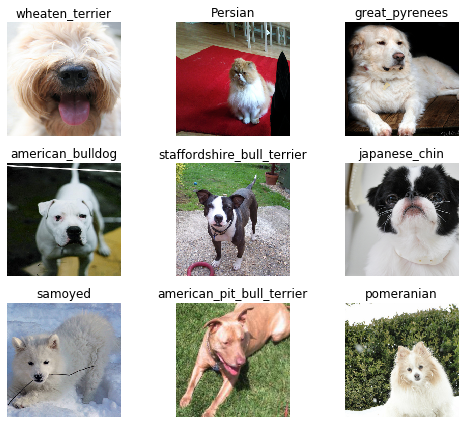

In [15]:
data.show_batch(rows=3, figsize=(7,6))

In [16]:
print(data.classes)

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


In [17]:
len(data.classes),data.c


(37, 37)

In [18]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/thomassw66/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:03<00:00, 21.9MB/s]


In [19]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [20]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.356574,0.342771,0.111637,00:22
1,0.598028,0.279865,0.087957,00:22
2,0.379814,0.246784,0.083221,00:22
3,0.269961,0.228282,0.073072,00:22


In [21]:
learn.save('stage-1')

In [22]:
interp = ClassificationInterpretation.from_learner(learn)

In [23]:
losses, idxs = interp.top_losses()
len(data.valid_ds) == len(losses) == len(idxs)

True

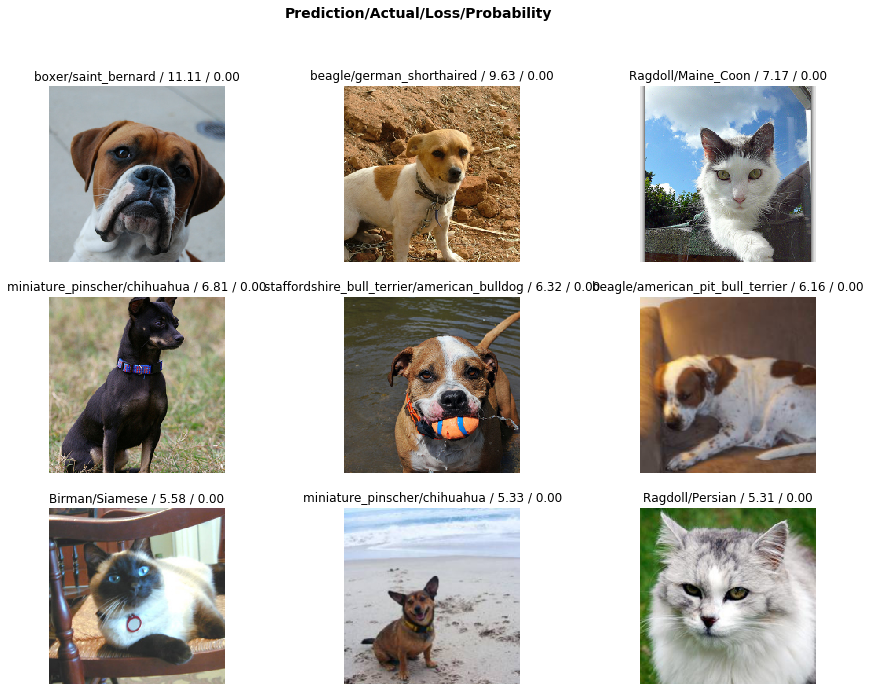

In [24]:
interp.plot_top_losses(9, figsize=(15,11))

In [25]:
doc(interp.plot_top_losses)

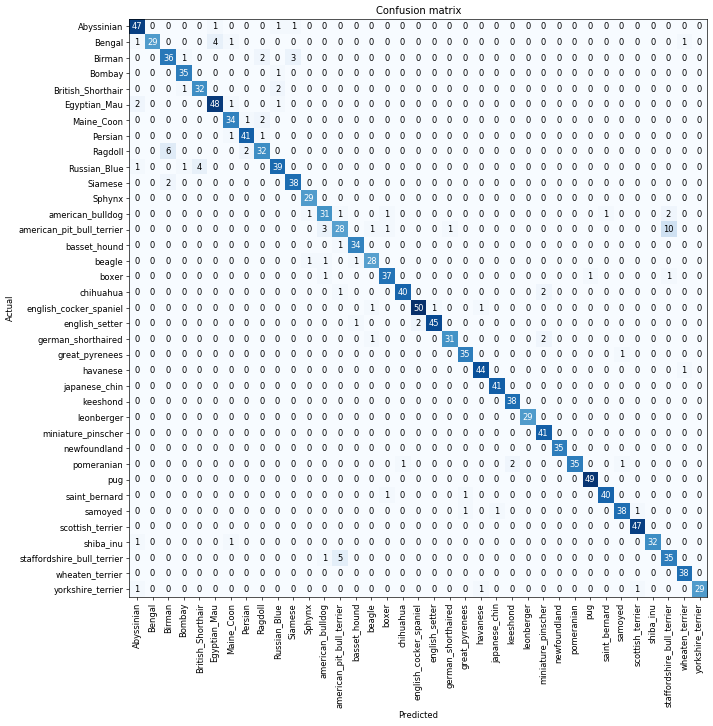

In [27]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [28]:
interp.most_confused(min_val=2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 10),
 ('Ragdoll', 'Birman', 6),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5),
 ('Bengal', 'Egyptian_Mau', 4),
 ('Russian_Blue', 'British_Shorthair', 4),
 ('Birman', 'Siamese', 3),
 ('american_pit_bull_terrier', 'american_bulldog', 3),
 ('Birman', 'Ragdoll', 2),
 ('British_Shorthair', 'Russian_Blue', 2),
 ('Egyptian_Mau', 'Abyssinian', 2),
 ('Maine_Coon', 'Ragdoll', 2),
 ('Ragdoll', 'Persian', 2),
 ('Siamese', 'Birman', 2),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('chihuahua', 'miniature_pinscher', 2),
 ('english_setter', 'english_cocker_spaniel', 2),
 ('german_shorthaired', 'miniature_pinscher', 2),
 ('pomeranian', 'keeshond', 2)]

In [30]:

learn.unfreeze()

In [31]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.659090,0.375975,0.112991,00:23


In [33]:
help(learn.fit_one_cycle)

Help on method fit_one_cycle in module fastai.train:

fit_one_cycle(cyc_len: int, max_lr: Union[float, Collection[float], slice] = slice(None, 0.003, None), moms: Tuple[float, float] = (0.95, 0.85), div_factor: float = 25.0, pct_start: float = 0.3, final_div: float = None, wd: float = None, callbacks: Union[Collection[fastai.callback.Callback], NoneType] = None, tot_epochs: int = None, start_epoch: int = None) -> None method of fastai.basic_train.Learner instance
    Fit a model following the 1cycle policy.



In [34]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
newfoundland,shiba_inu,newfoundland,samoyed,Bombay
Path: /home/thomassw66/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
miniature_pinscher,Egyptian_Mau,Egyptian_Mau,leonberger,boxer
Path: /home/thomassw66/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kerne

In [35]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


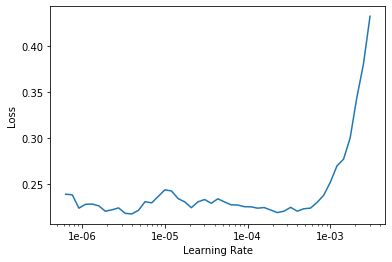

In [36]:
learn.recorder.plot()

In [37]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.227882,0.223780,0.074425,00:23
1,0.209260,0.217960,0.071042,00:23


In [38]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.777961,0.430405,0.121786,00:23


In [39]:

learn.fit_one_cycle(2, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.469436,0.346381,0.105548,00:22
1,0.406744,0.332112,0.098106,00:23


In [40]:
learn.fit_one_cycle(2, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.386739,0.310096,0.095399,00:22
1,0.328734,0.294144,0.090663,00:23


In [41]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=299, bs=bs//2).normalize(imagenet_stats)

In [42]:
learn = cnn_learner(data, models.resnet50, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/thomassw66/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 271MB/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


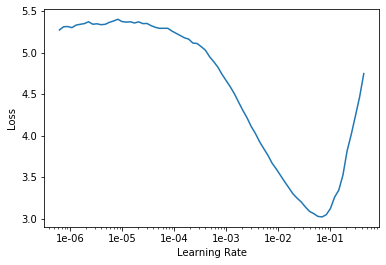

In [43]:
learn.lr_find()
learn.recorder.plot()

In [44]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.715032,0.312537,0.090663,00:49
1,0.508956,0.315022,0.095399,00:48
2,0.441900,0.291656,0.083897,00:48
3,0.358459,0.266427,0.069012,00:48
4,0.271026,0.230595,0.064953,00:48
5,0.185085,0.214645,0.059540,00:48
6,0.147530,0.189769,0.049391,00:48
7,0.094962,0.188994,0.048714,00:48


In [45]:
learn.save('stage-1-50')

In [46]:
interp = ClassificationInterpretation.from_learner(learn)

In [47]:
interp.most_confused(min_val=2)

[('Egyptian_Mau', 'Bengal', 5),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 5),
 ('Ragdoll', 'Birman', 4),
 ('miniature_pinscher', 'chihuahua', 4),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 4),
 ('Russian_Blue', 'Bombay', 3),
 ('Siamese', 'Birman', 3),
 ('British_Shorthair', 'Russian_Blue', 2),
 ('Sphynx', 'Abyssinian', 2),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('basset_hound', 'beagle', 2)]

In [48]:
path = untar_data(URLs.MNIST_SAMPLE); path

PosixPath('/home/thomassw66/.fastai/data/mnist_sample')

In [49]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=26)

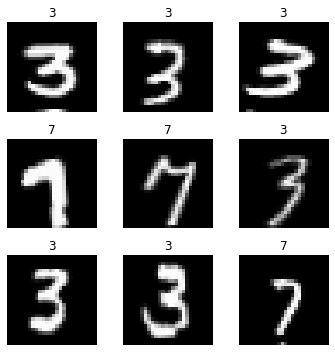

In [50]:
data.show_batch(rows=3, figsize = (5,5))

In [51]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
learn.fit(2)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /home/thomassw66/.cache/torch/checkpoints/resnet18-5c106cde.pth
100%|██████████| 44.7M/44.7M [00:03<00:00, 15.6MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.190902,0.100859,0.959274,00:06
1,0.126911,0.051937,0.981354,00:05


In [52]:
df = pd.read_csv(path/'labels.csv')
df.head() 

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


In [53]:
data = ImageDataBunch.from_df(path, df, ds_tfms=tfms, size=24)
data.classes

[0, 1]

In [54]:
fn_paths = [path/name for name in df['name']]; fn_paths[:2]

[PosixPath('/home/thomassw66/.fastai/data/mnist_sample/train/3/7463.png'),
 PosixPath('/home/thomassw66/.fastai/data/mnist_sample/train/3/21102.png')]

In [55]:
labels = [('3' if '/3/' in str(x) else '7') for x in fn_paths]

In [56]:
labels[:5]

['3', '3', '3', '3', '3']

In [57]:
data = ImageDataBunch.from_lists(path, fn_paths, labels=labels, ds_tfms=tfms, size=24)
data.classes

['3', '7']

In [8]:
from fastai.data_block import LabelList
??ItemList

In [9]:
??LabelList

In [10]:
import pandas as pd 
??pd.DataFrame

In [11]:
??ImageItemList

Object `ImageItemList` not found.


In [12]:
from fastai.data_block import ImageItemList


ImportError: cannot import name 'ImageItemList' from 'fastai.data_block' (/opt/anaconda3/lib/python3.7/site-packages/fastai/data_block.py)